In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc

rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)
plt.rcParams['figure.figsize'] = (12, 8)

In [87]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [88]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [89]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [90]:
# 데이터의 행과 열 정보, 데이터 타입, 결측치
print('데이터의 행과 열 개수')
print(df_train.shape)
print()
print('데이터 정보')
print(df_train.info())
print()
print('데이터 타입')
print(df_train.dtypes)
print()
print('결측치')
print(df_train.isnull().sum())

print()
print('-----------------')
print()

print('데이터의 행과 열 개수')
print(df_test.shape)
print()
print('데이터 정보')
print(df_test.info())
print()
print('데이터 타입')
print(df_test.dtypes)
print()
print('결측치')
print(df_test.isnull().sum())

데이터의 행과 열 개수
(1460, 81)

데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- train 데이터에는 81개의 열(SalePrice 추가)과 1460개의 행이 존재한다.

- test 데이터에는 80개의 열과 1459개의 행이 존재한다.

- 분양가와 관련된 정보들을 포함하고 있다. 일부 데이터들은 SalePrice를 예측하는데 도움이 되지 않을 수 있고, 일부 데이터끼리 강한 상관관계를 가질 수 있겠다.

- 일부 데이터에서는 많은 결측치를 포함하고 있다. Poo1QC 해당 값은 train : 7개, test : 3개만 존재한다.

- 결측치는 대부분 Object type에서 발생하고 있다.

In [93]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

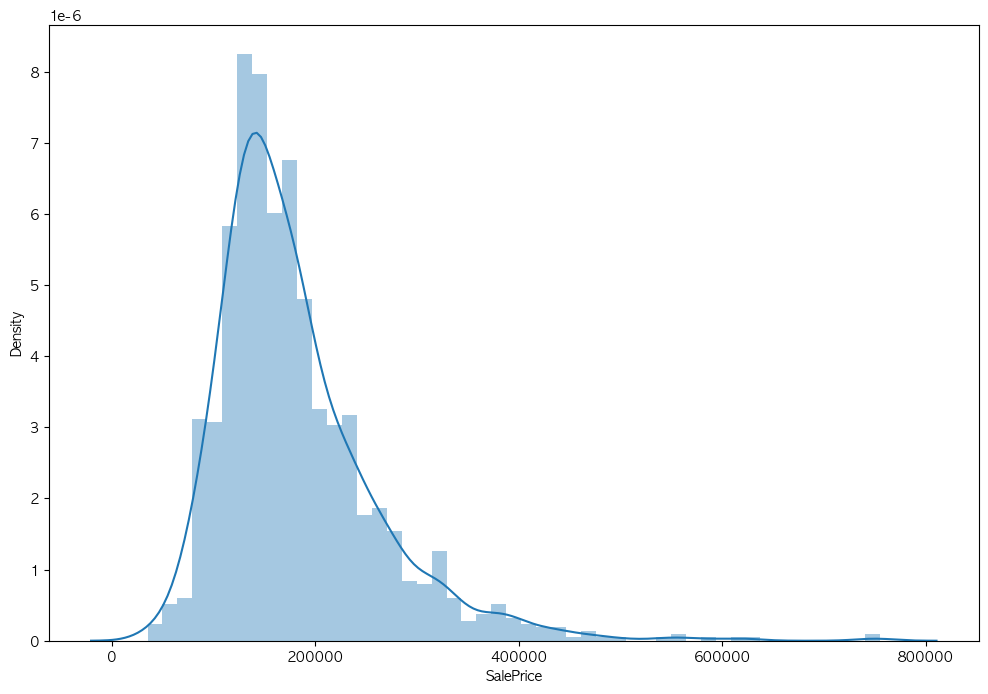

In [94]:
sns.distplot(df_train['SalePrice'])
plt.show()

In [95]:
print("Skewness : %f"%df_train['SalePrice'].skew()) # 왜도
print("Kurtosis : %f"%df_train['SalePrice'].kurt()) # 첨도

Skewness : 1.882876
Kurtosis : 6.536282


- 위 결과를 통해 오른쪽으로 치우치면서, 뾰족한 분포를 나타내고 있음을 알 수 있다. 따라서 타겟변수 SalePrice는 정규분포를 따르지 않는다.
- 로그변환을 통해 분포를 정규분포화하는 작업이 필요하다.

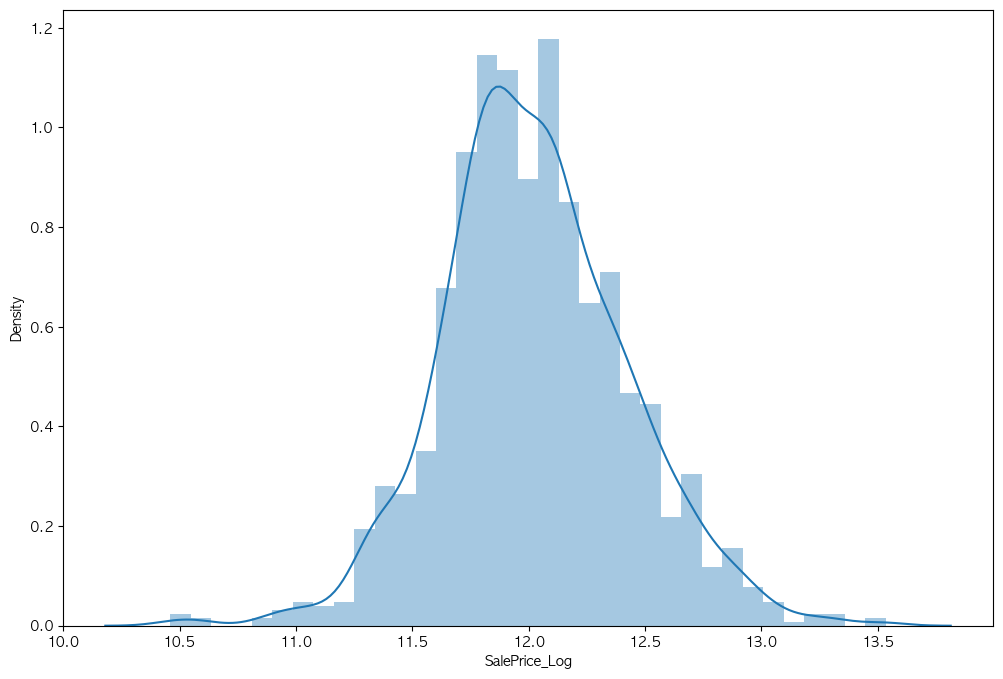

In [96]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

sns.distplot(df_train['SalePrice_Log'])
plt.show()

In [97]:
print("Skewness : %f"%df_train['SalePrice_Log'].skew())
print("Kurtosis : %f"%df_train['SalePrice_Log'].kurt())

Skewness : 0.121335
Kurtosis : 0.809532


- 이전 그래프에 비해 첨도가 낮아짐으로써, 비교적 뭉툭해졌다고 말할 수 있다. 추가로 왜도 또한 값이 줄어들며, 치우침이 적어진 모습을 살펴볼 수 있었다.
- 정규분포 형태에 가까워졌다.

In [98]:
df_train.drop('SalePrice', axis=1, inplace=True)

In [99]:
df_train.index

RangeIndex(start=0, stop=1460, step=1)

In [100]:
numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index
print('Number of Numerical features : ', len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == 'object'].index
print('Number of Categorical features : ', len(categorical_feats))

Number of Numerical features :  38
Number of Categorical features :  43


In [101]:
df_train[numerical_feats].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object')

In [102]:
df_train[categorical_feats].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [103]:
df_train[numerical_feats].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice_Log  
0      12.247694  
1      12.109011  
2      12.317167  
3      11.849398  
4      12.429216  

[5 rows x 38 columns]

In [104]:
df_train[categorical_feats].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

- 범주형 데이터에서 NaN(결측값)이 많이 발견되는 모습을 살펴볼 수 있다.

In [105]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # 비율
print("[ Total ]")
print(total)
print()
print("[ Percent ]")
print(percent)

[ Total ]
PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
SalePrice_Log       0
Length: 81, dtype: int64

[ Percent ]
PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
MasVnrType       0.597260
                   ...   
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
SalePrice_Log    0.000000
Length: 81, dtype: float64


In [106]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # 비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

# 결측값 채우기
- 몇 개의 열들에 많은 NaN 항목이 있다. PoolQC를 비롯한 많은 데이터들이 데이터 누락이 아니라 단순히 해당 내용이 집에 포함되어 있지 않다는 것을 의미한다.

In [107]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# 위와 같은 데이터들이 단순히 '없음'을 의미한다.
# 따라서 바꿔야 할 데이터명을 직접 지정해주는 것이 아닌, 채워줄 값만 골라 작성해주면 된다.(fillna활용)
# NaN을 None으로 수정해주자.
for col in cols_fillna:
    df_train[col].fillna('None', inplace=True)
    df_test[col].fillna('None', inplace=True) # inplace : 한 번에 적용시켜주는 매개변수

In [108]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # 비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
Id                0  0.000000
KitchenAbvGr      0  0.000000

- LotFrontage : 집과 연결된 도로의 피트
- GarageYrBit : 차고가 지어진 연도
- MasVnrArea : 벽돌 면적

    -> 세 개 데이터의 공통점 : 모두 연속형(숫자) 데이터 평균값으로 채워주자.

In [109]:
df_train['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [110]:
# 평균값으로 채워주는 과정
df_train['LotFrontage'].fillna(df_train.LotFrontage.mean(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train.GarageYrBlt.mean(), inplace=True)
df_train['MasVnrArea'].fillna(df_train.MasVnrArea.mean(), inplace=True)

In [111]:
numeric_cols = df_test.select_dtypes(include=[np.number]).columns
df_test[numeric_cols].fillna(df_test[numeric_cols].mean(), inplace=True)

In [112]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) # 비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Id               0      0.0
CentralAir       0      0.0
GarageYrBlt      0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0

In [113]:
print('train data 결측값 : ', df_train.isnull().sum().sum(), '개')
print('test data 결측값 : ', df_test.isnull().sum().sum(), '개')

train data 결측값 :  0 개
test data 결측값 :  330 개


In [114]:
numeric_cols = df_test.select_dtypes(include=[np.number]).columns
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_test[numeric_cols].mean())

In [115]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False) # 비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

Total  Percent
Id               0      0.0
MSSubClass       0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0
Fireplaces       0      0.0

In [116]:
print('train data 결측값 : ', df_train.isnull().sum().sum(), '개')
print('test data 결측값 : ', df_test.isnull().sum().sum(), '개')

train data 결측값 :  0 개
test data 결측값 :  0 개


# 로그 변환
- 타겟 변수와 마찬가지로 일부 값들도 정규 분포를 따르지 않는다면, 로그값을 사용해 정규분포화 시켜주자.
- 각 값들의 왜도와 첨도를 확인하자.


In [117]:
for col in numerical_feats:
    print('{:13}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()),
          '        ',
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
         )

Id            Skewness: 00.00          Kurtosis: -01.20
MSSubClass    Skewness: 01.41          Kurtosis: 001.58
LotFrontage   Skewness: 02.38          Kurtosis: 021.85
LotArea       Skewness: 12.21          Kurtosis: 203.24
OverallQual   Skewness: 00.22          Kurtosis: 000.10
OverallCond   Skewness: 00.69          Kurtosis: 001.11
YearBuilt     Skewness: -0.61          Kurtosis: -00.44
YearRemodAdd  Skewness: -0.50          Kurtosis: -01.27
MasVnrArea    Skewness: 02.68          Kurtosis: 010.15
BsmtFinSF1    Skewness: 01.69          Kurtosis: 011.12
BsmtFinSF2    Skewness: 04.26          Kurtosis: 020.11
BsmtUnfSF     Skewness: 00.92          Kurtosis: 000.47
TotalBsmtSF   Skewness: 01.52          Kurtosis: 013.25
1stFlrSF      Skewness: 01.38          Kurtosis: 005.75
2ndFlrSF      Skewness: 00.81          Kurtosis: -00.55
LowQualFinSF  Skewness: 09.01          Kurtosis: 083.23
GrLivArea     Skewness: 01.37          Kurtosis: 004.90
BsmtFullBath  Skewness: 00.60          Kurtosis:

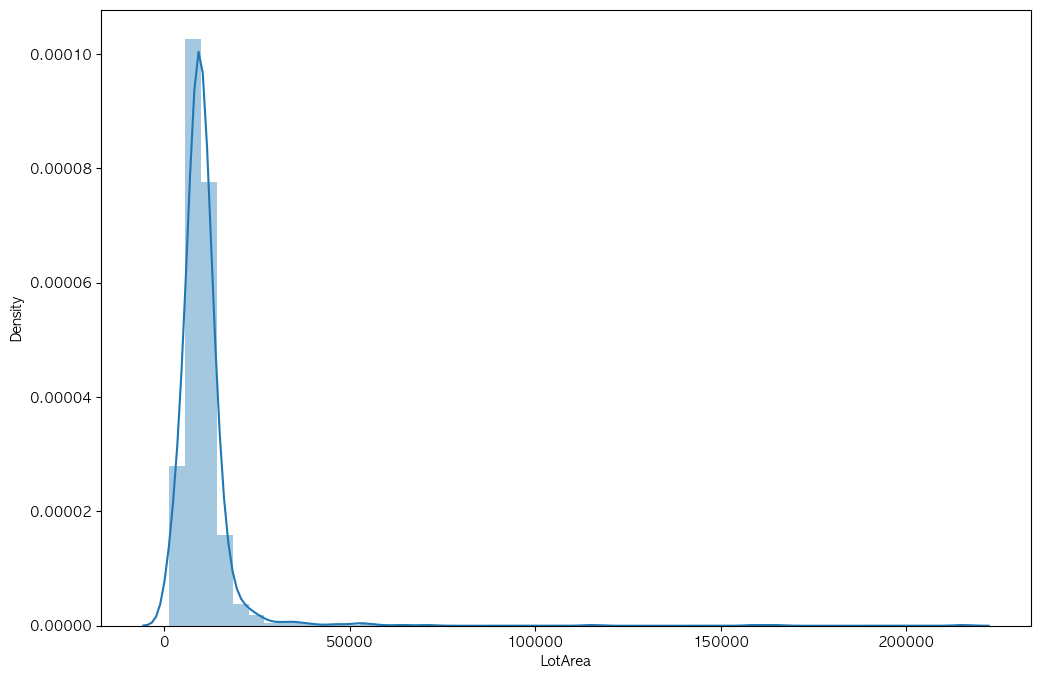

In [118]:
sns.distplot(df_train['LotArea'])
plt.show()

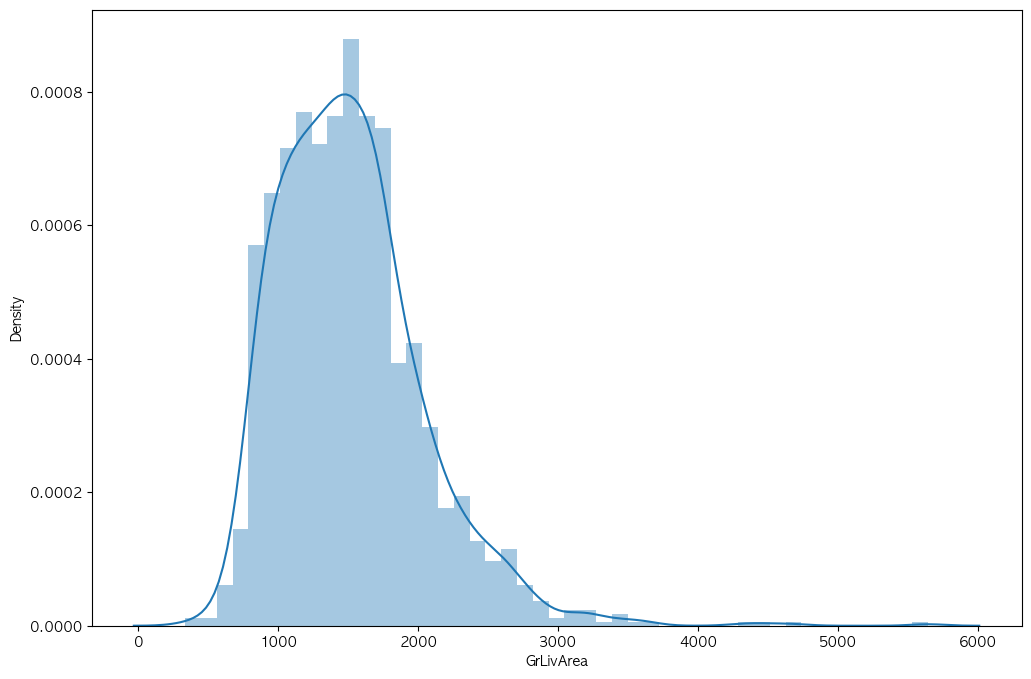

In [119]:
sns.distplot(df_train['GrLivArea'])
plt.show()

In [120]:
for df in [df_train, df_test]:
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace=True, axis=1)
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace=True, axis=1)

# numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index

In [121]:
numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index
numerical_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice_Log', 'LotArea_Log', 'GrLivArea_Log'],
      dtype='object')

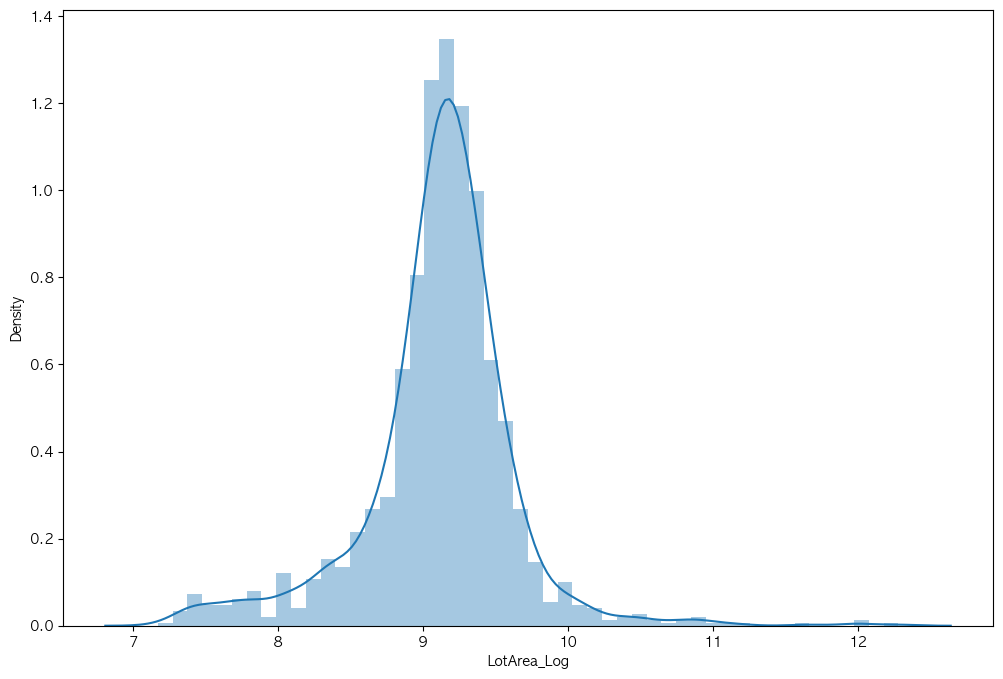

In [122]:
sns.distplot(df_train['LotArea_Log'])
plt.show()

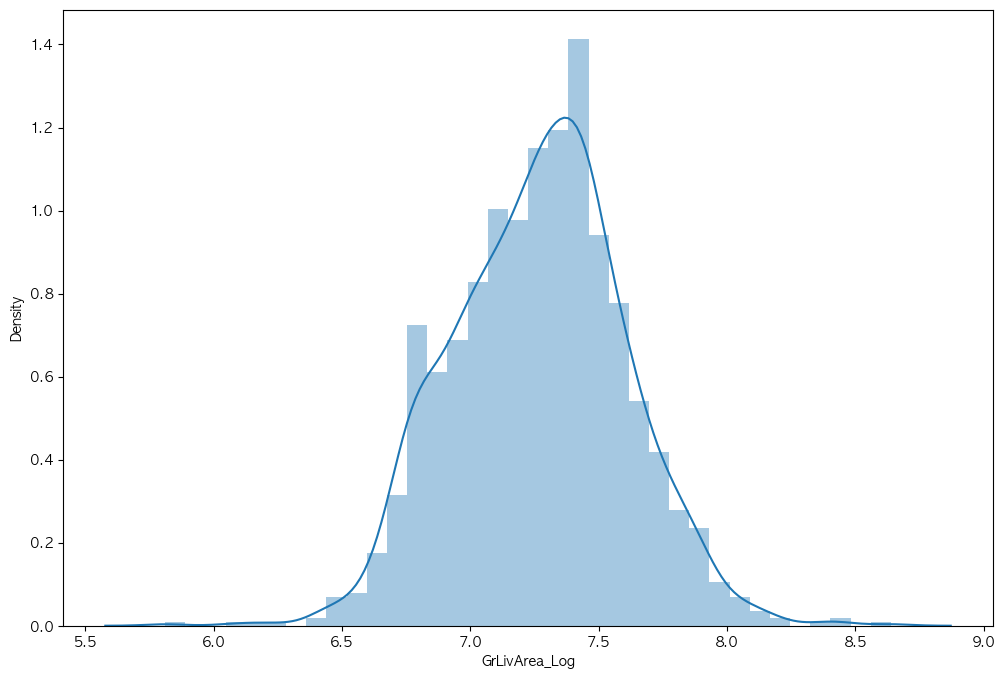

In [123]:
sns.distplot(df_train['GrLivArea_Log'])
plt.show()

In [124]:
print("Skewness: %f"%df_train['LotArea_Log'].skew())
print("Kurtosis: %f"%df_train['LotArea_Log'].kurt())

Skewness: -0.137994
Kurtosis: 4.713358


In [125]:
print("Skewness: %f"%df_train['GrLivArea_Log'].skew())
print("Kurtosis: %f"%df_train['GrLivArea_Log'].kurt())

Skewness: -0.006995
Kurtosis: 0.282603


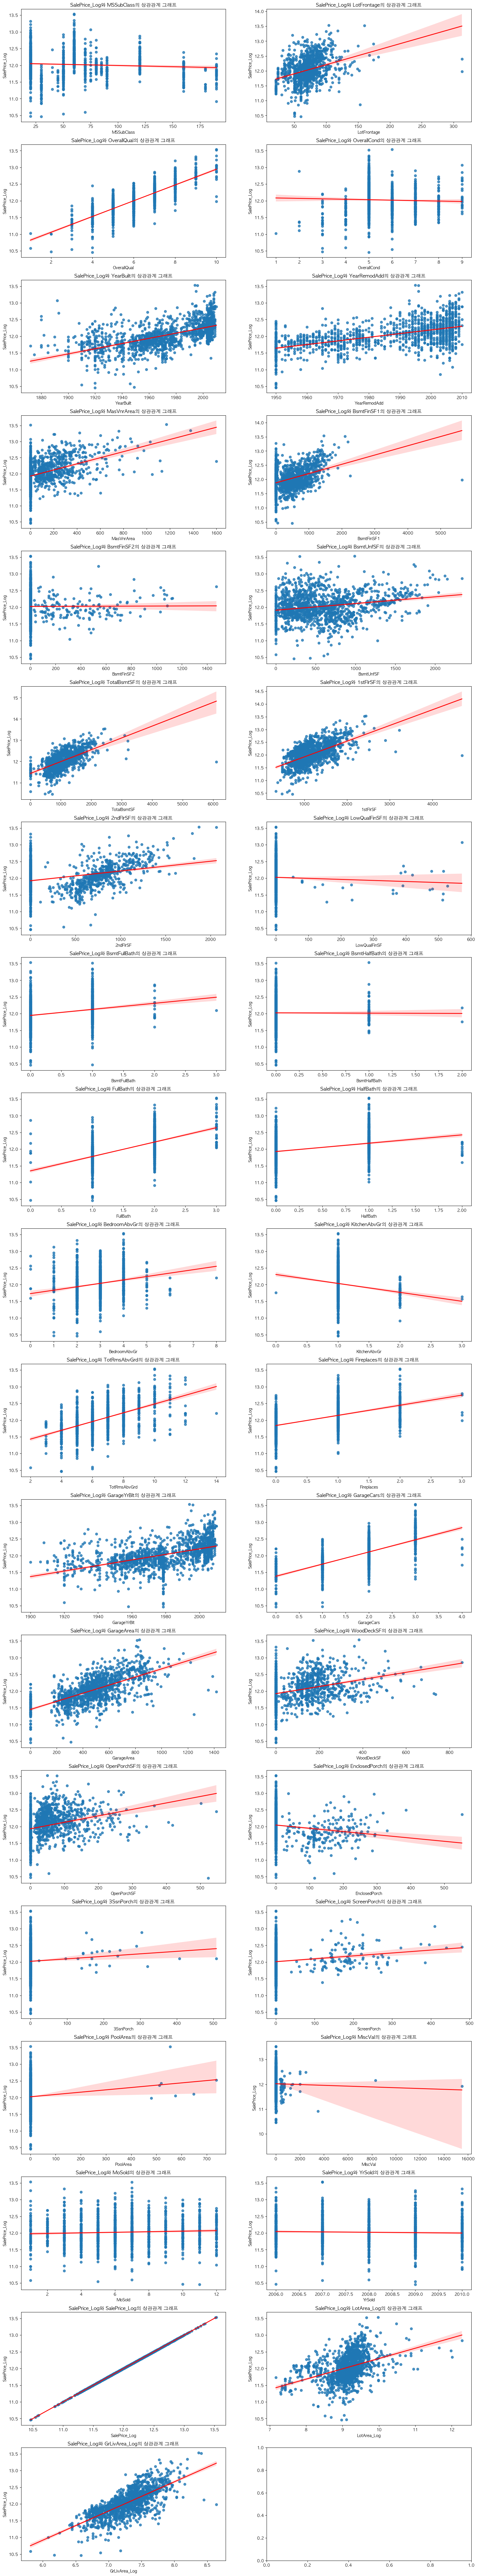

In [126]:
# 과제1) SalePrice_Log와 나머지 값들 상관관계 그래프 regplot 그리기(단, ID는 제외)
cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
cols.remove('Id')

num_cols = 2
num_rows = (len(cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.regplot(x=df_train[col], y=df_train['SalePrice_Log'], line_kws={'color': 'red', 'lw': 2}, ax=axes[i])   
    axes[i].set_title(f'SalePrice_Log와 {col}의 상관관계 그래프')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice_Log')

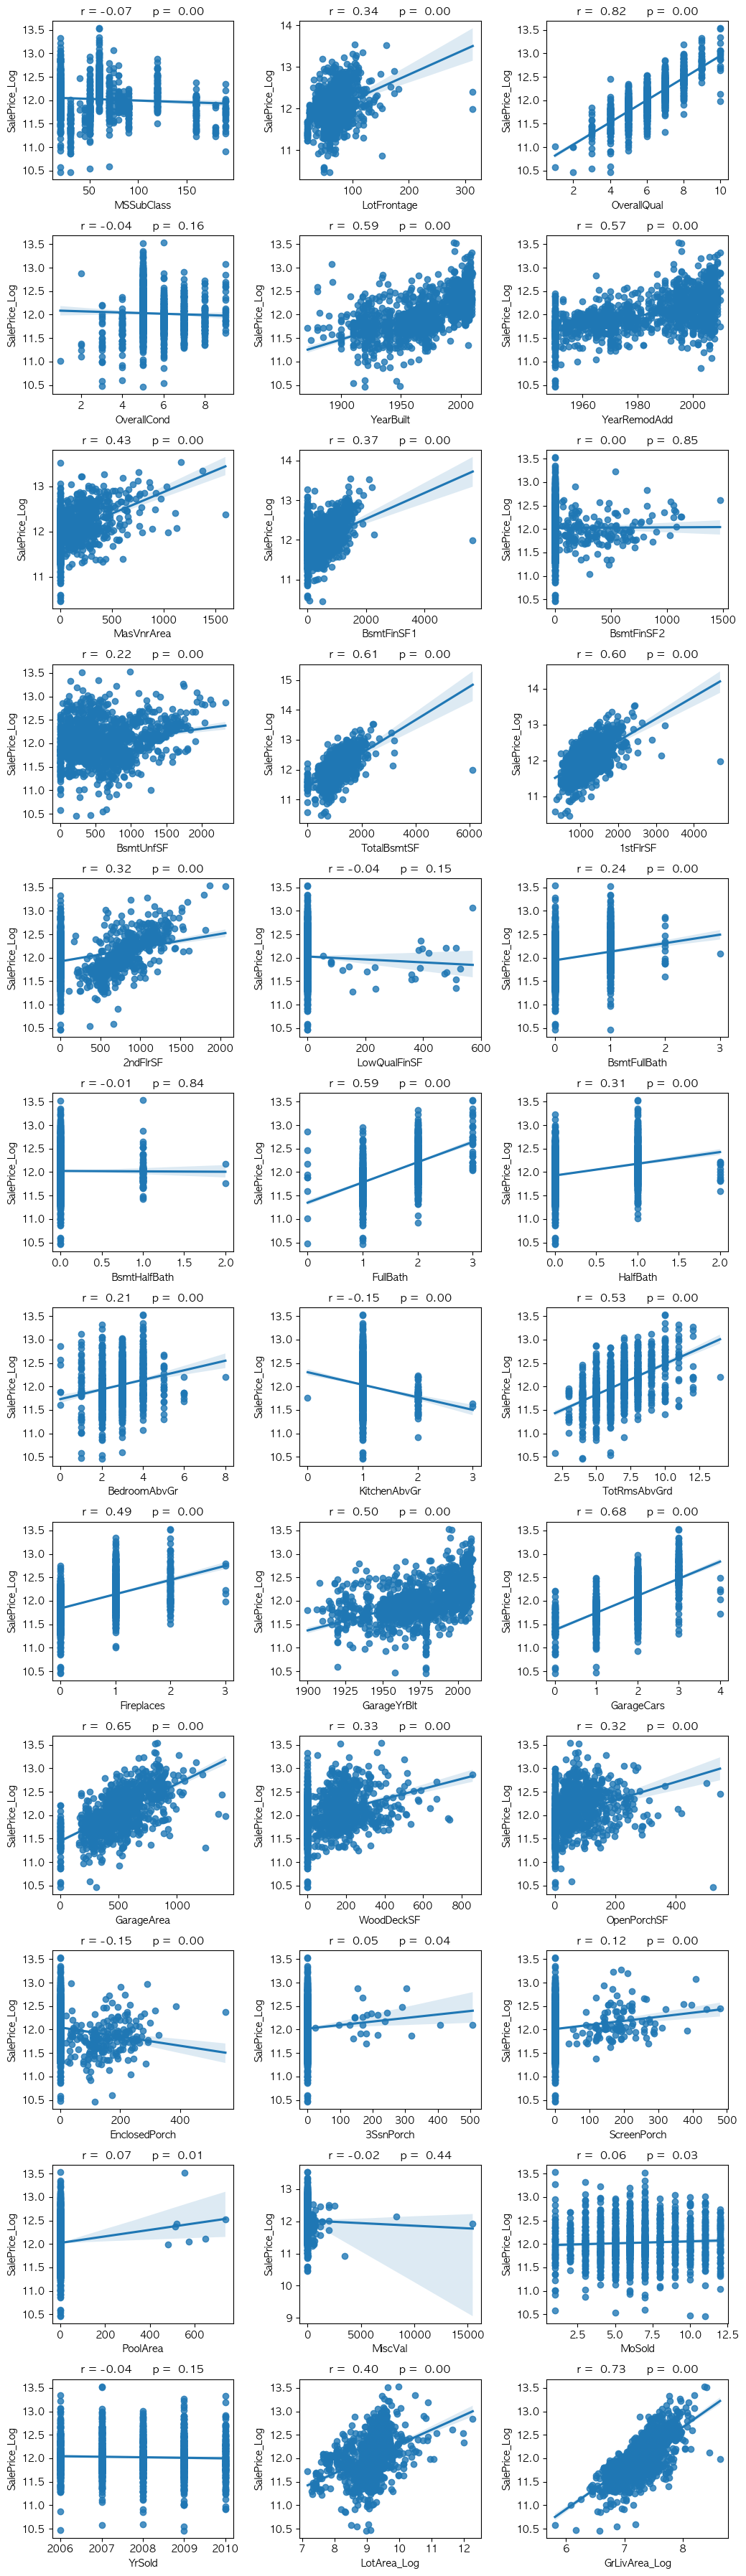

In [127]:
# 과제1 강사님 코드
from scipy import stats

nr_rows = 12
nr_cols = 3
target = 'SalePrice_Log'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

li_num_feats = list(numerical_feats)
li_plot_num_feats = [c for c in li_num_feats if c not in ['SalePrice_Log', 'Id']]

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r*nr_cols + c
        if i < len(li_plot_num_feats):
            sns.regplot(x=df_train[li_plot_num_feats[i]], y = df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            str_title = 'r = ' + '{0: .2f}'.format(stp[0]) + '      p = ' + '{0: .2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11) # 그래프의 기울기에 따른 r값 출력
        else:
            break

plt.tight_layout()
plt.show()

- scipy.stats.pearsonr 함수는 피어슨 상관계수(Pearson correlation confficient)와 p-value를 계산한다.
- 해당 함수는 두 변수간의 선형 관계를 수치적으로 측정해준다.

# 피어슨 상관계수
- 1에 가까운 값 : 두 변수 간에 강한 양의 선형관계가 있다.
- -1에 가까운 값 : 두 변수 간에 강한 음의 선형관계가 있다.
- 0에 가까운 값 : 두 변수 간에 선형관계가 거의 없다.

# p-value
- 작은 p-value(일반적으로 0.05보다 작은 경우) : 상관계수가 통계적으로 유의미하다.
- 큰 p-value : 통계적으로 유의미하지 않다.

# EDA
- 과제2) 각 column들의 정보가 들어있는 텍스트 파일 읽어보기
- 과제3) 상관관계가 높은 값들을 찾아보기
 
  // 과제2를 통해 상관관계가 높을 것이라고 예상되는 변수가 과제3을 통해 살펴보았을 때 다른 점이 있었는지 등


1) OverallQual(집의 전체적인 재료와 마감재)와 같은 일부 기능들이 타겟과 강한 상관관계를 이루고 있다.
2) MSSubClass과 같은 일부 기능들이 타겟과 약한 상관관계를 이루고 있다.
   
  => 데이터 분석을 위해 어떠한 값들을 사용할지 정해야 한다. 특정 임계값보다 큰 상관관계를 갖는 값들만 예측에서 사용하기로 하자.

min_val_corr = 0.4과 같은 식으로 특정 임계값을 글로벌 변수로 지정을 해두고, 약한 상관관계를 가진 값들을 삭제할 수 있다.

일부 숫자 열(OverallQual, MSSubClass 등)에 대해서 해당 값들은 숫자형 데이터가 아니라, 실제로 범주형 값임을 알 수 있다.

In [128]:
# 이상치 예상 (OverallQual:10, SalePrice_Log < 12.5) (GrLivArea_Log>8.3, SalePrice_Log < 12.5)
df_train = df_train.drop(
    df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice_Log'] < 12.5)].index) # index를 뽑아서 drop 시켜주겠다는 의미를 갖는다.

df_train = df_train.drop(
    df_train[(df_train['GrLivArea_Log'] > 8.3) & (df_train['SalePrice_Log'] < 12.5)].index)

In [129]:
corr = df_train[numerical_feats].corr()
corr_abs = corr.abs()

nr_num_size = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_size, target)[target]

# 상관관계가 높고 낮은 애들을 정렬(숫자형 변수)
min_val_corr = 0.4 # 기준 선

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values < min_val_corr].index)

print('Numberical features with r above min_val_corr : ', cols_abv_corr_limit)
print()
print('-'*80)
print()
print('Numberical features with r above min_val_corr : ', cols_bel_corr_limit)

Numberical features with r above min_val_corr :  ['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea_Log']

--------------------------------------------------------------------------------

Numberical features with r above min_val_corr :  ['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [130]:
# 범주형 변수도 상관관계 정도를 알아보기 위해
for cat in list(categorical_feats) :
    print(df_train[cat].value_counts())
    print('#'*40)

MSZoning
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
########################################
Street
Pave    1452
Grvl       6
Name: count, dtype: int64
########################################
Alley
None    1367
Grvl      50
Pave      41
Name: count, dtype: int64
########################################
LotShape
Reg    925
IR1    483
IR2     41
IR3      9
Name: count, dtype: int64
########################################
LandContour
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: count, dtype: int64
########################################
Utilities
AllPub    1457
NoSeWa       1
Name: count, dtype: int64
########################################
LotConfig
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
########################################
LandSlope
Gtl    1380
Mod      65
Sev      13
Name: count, dtype: int64
########################################
Neighbor

# 박스플롯을 보고 범주형 변수와 타겟 변수 간의 관계를 분석하기
- 중앙값(Median) : 각 범주에 대한 타겟 변수의 중앙값을 비교한다. 범주들의 중앙값들이 크게 다르다면 해당 범주형 변수는 타겟 변수에 중요한 영향을 미칠 가능성이 있다.
- IQR : 상자 내부의 길이를 비교한다. 길이가 짧을수록 데이터가 중앙값에 모여있다는 의미를 나타낸다.
- 이상치 : 이상치가 많은 범주는 그 범주형 변수가 타겟 변수에 큰 변동성을 가져올 수 있다는 의미를 나타낸다.
  

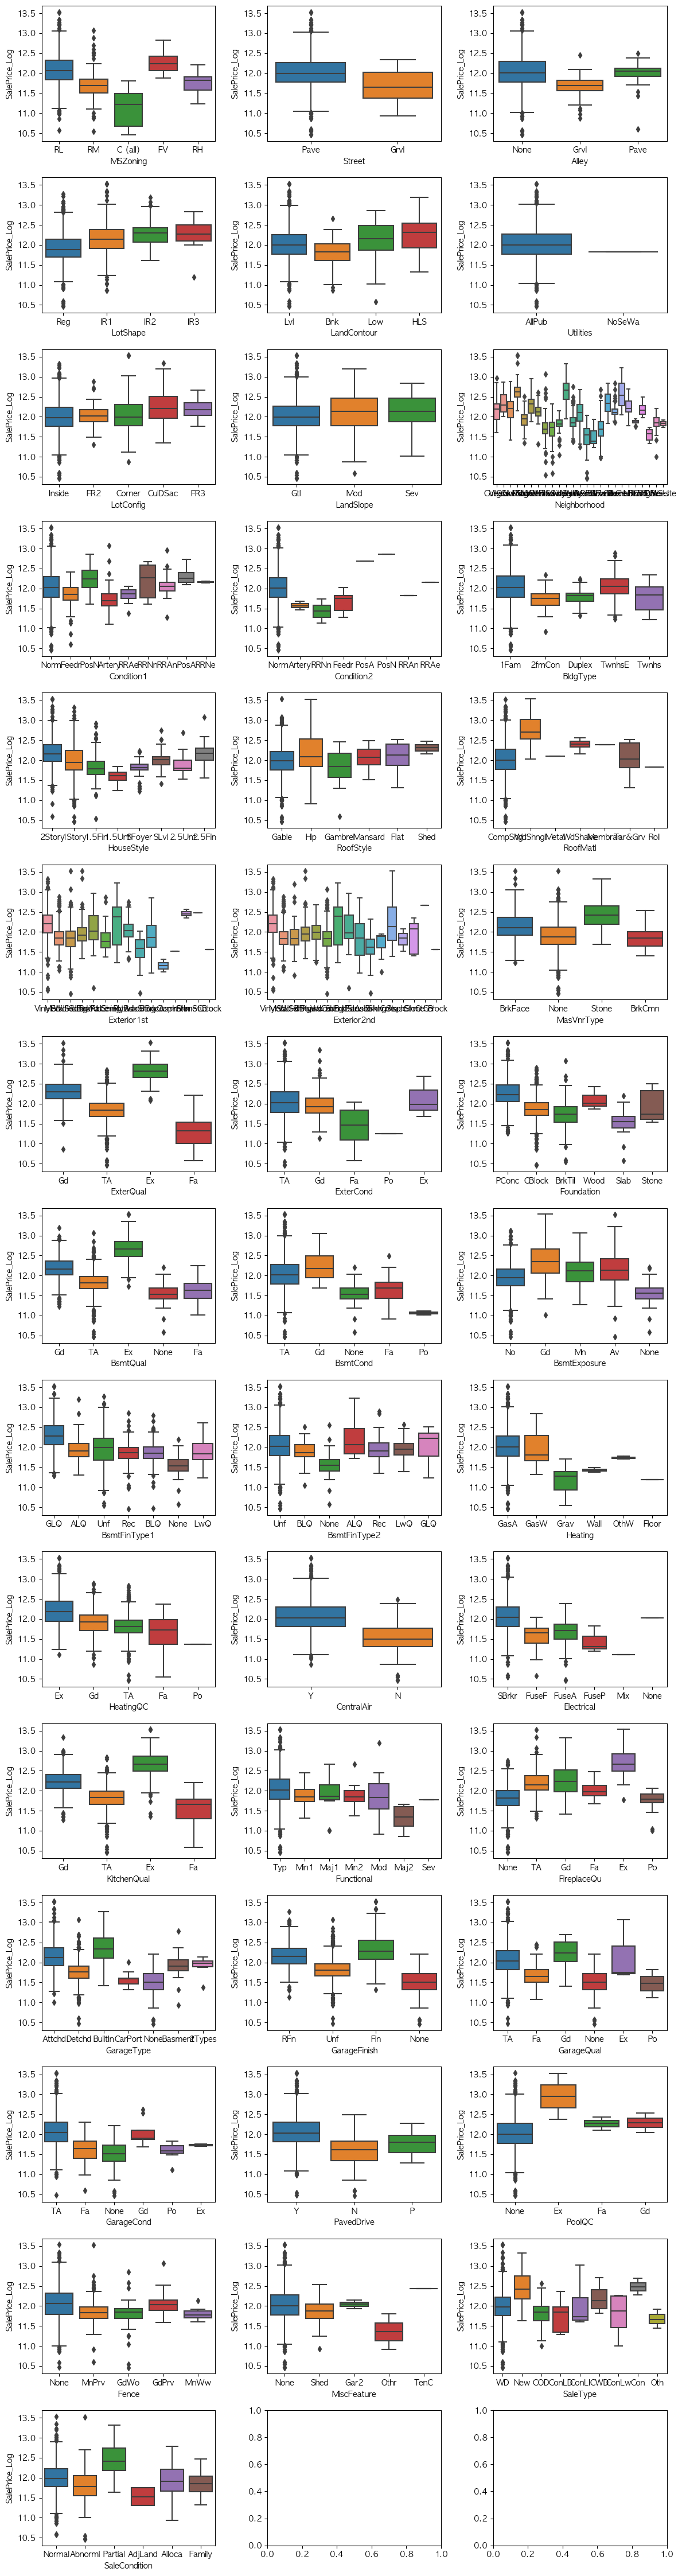

In [131]:
# 타겟변수(SalePrice_Log)와 범주형 변수들간의 박스플롯 그리기
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4, nr_rows*3))

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, ax=axs[r][c])
        else:
            break

plt.tight_layout()
plt.show()

# EDA(범주형)
- 범주형 데이터에서 타겟 변수와 높은 상관관계를 가지는 변수가 많지 않다.
- 높은 상관관계를 가진 범주형 데이터를 기준으로 분석에 사용할 수 있다.

In [132]:
# 강사님이 임의로 나눠놓은 상관관계가 높고, 낮은 컬럼(범주형)
catg_strong_corr = ['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition']

In [133]:
nr_feats = len(cols_abv_corr_limit)

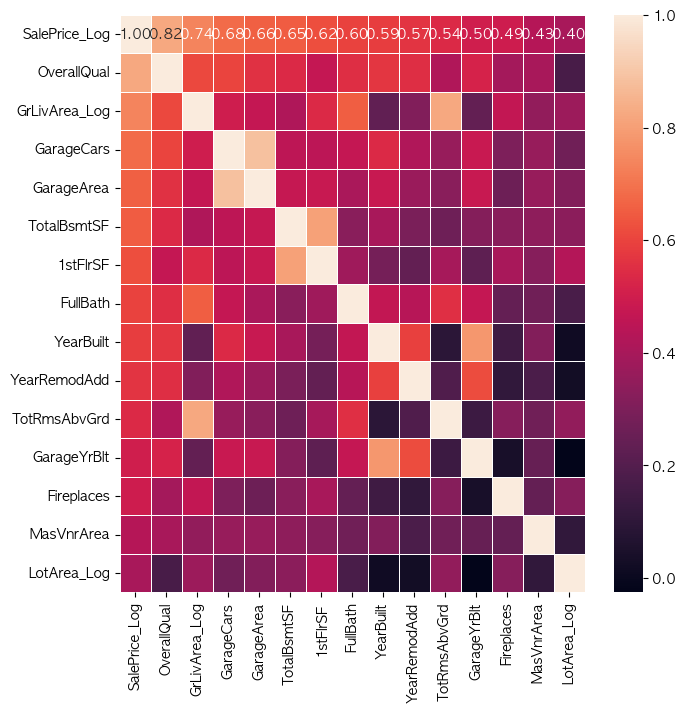

In [134]:
# 히트맵
# df : 데이터 프레임, nr_c : 상위 상관 계수, targ : 타겟 변수
def plot_corr_matrix(df, nr_c, targ):
    numerical_df = df.select_dtypes(include=[np.number]).columns
    # 데이터 프레임에서 숫자형 열 선택
    # select dtypes 메소드를 사용하여 숫자형 데이터 타입을 가진 열을 필터링 한다.

    # 상관 행렬 계산
    corr = df[numerical_df].corr()
    corr_abs = corr.abs()
    # corr : 숫자형 열들 간의 상관 행렬을 계산
    # corr_abs : 상관 행렬의 절댓값을 계산(상관 계수의 크기만 고려하기 위해)
    
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    # 타겟 변수와 가장 상관이 높은 변수들을 선택
    # nr_c는 선택할 상위 상관 계수의 개수이다.
    # corr.abs.nlargest(nr_c, targ) : 타겟 변수와 상관 계수가 가장 큰 nr_c개의 변수 선택
    # cols = 상위 상관 계수를 가진 변수들의 이름 포함
    
    cm = np.corrcoef(df[cols].values.T) # 상관행렬
    # cols에 해당하는 변수들의 값으로 상관 형렬을 다시 계산한다.
    # .T : 전치행렬

    # 히트맵 시각화
    plt.figure(figsize=(nr_c/2, nr_c/2))
    sns.heatmap(cm, annot=True, fmt='.2f', linewidths=.5, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

plot_corr_matrix(df_train, nr_feats, target)

- 타겟 변수와 큰 상관관계가 있는 값들 중 일부는 서로 강한 상관관계를 나타내고 있다.
- 다중 공선성으로 인한 ML 회귀 모델의 실패를 방지하기 위해 제거해야 한다.

# 최종 데이터 전처리
1) SalePrice과 상관관계가 낮은 모든 열 삭제
2) 범주형 데이터를 수치형 데이터로 변환(원-핫 인코딩(One-Hot Encoding), 레이블 인코딩(Label Encoding))
3) 결측값이 있는 열 처리
4) 로그 변환(정규분포화)
5) 비슷한 특성(타겟&특정 컬럼)과 강한 상관관계를 가지는 열 삭제(사실상 중복과 동일함으로, 삭제 처리를 해줘야 한다.)

In [135]:
# 기존 데이터에서 drop을 통해 상관관계가 약한 열 삭제
cols_to_drop = cols_bel_corr_limit + catg_weak_corr + ['Id']

for df in [df_train, df_test]:
    df.drop(cols_to_drop, axis=1, inplace=True)

In [136]:
df.head()

MSZoning Neighborhood Condition2  OverallQual  YearBuilt  YearRemodAdd  \
0       RH        NAmes       Norm            5       1961          1961   
1       RL        NAmes       Norm            6       1958          1958   
2       RL      Gilbert       Norm            5       1997          1998   
3       RL      Gilbert       Norm            6       1998          1998   
4       RL      StoneBr       Norm            8       1992          1992   

  MasVnrType  MasVnrArea ExterQual BsmtQual  ...  FullBath KitchenQual  \
0       None         0.0        TA       TA  ...         1          TA   
1    BrkFace       108.0        TA       TA  ...         1          Gd   
2       None         0.0        TA       Gd  ...         2          TA   
3    BrkFace        20.0        TA       TA  ...         2          Gd   
4       None         0.0        Gd       Gd  ...         2          Gd   

  TotRmsAbvGrd  Fireplaces  GarageYrBlt GarageCars  GarageArea  SaleType  \
0            5           0       1961.0        1.0       730.0        WD   
1            6           0       1958.0        1.0       312.0        WD   
2            6           1       1997.0        2.0       482.0        WD   
3            7           1       1998.0        2.0       470.0        WD   
4            5           0       1992.0        2.0       506.0        WD   

   LotArea_Log  GrLivArea_Log  
0     9.360655       6.797940  
1     9.565704       7.192182  
2     9.534595       7.395722  
3     9.208138       7.380256  
4     8.518193       7.154615  

[5 rows x 24 columns]

// 범주형 열을 숫자로 변환 //

박스플롯에서 EDA의 범주를 통해 강한 관계를 가진 범주형 데이터를 분류할 수 있었다.

강한 관계를 가진 범주형 값들의 경우, 숫자로 변환한다.

1) 범주형 열과 타겟의 관계를 더 자세히 살펴보기 위해 바이올린 플롯을 사용할 수 있다.
2) 범주의 타겟의 평균을 살펴본다.

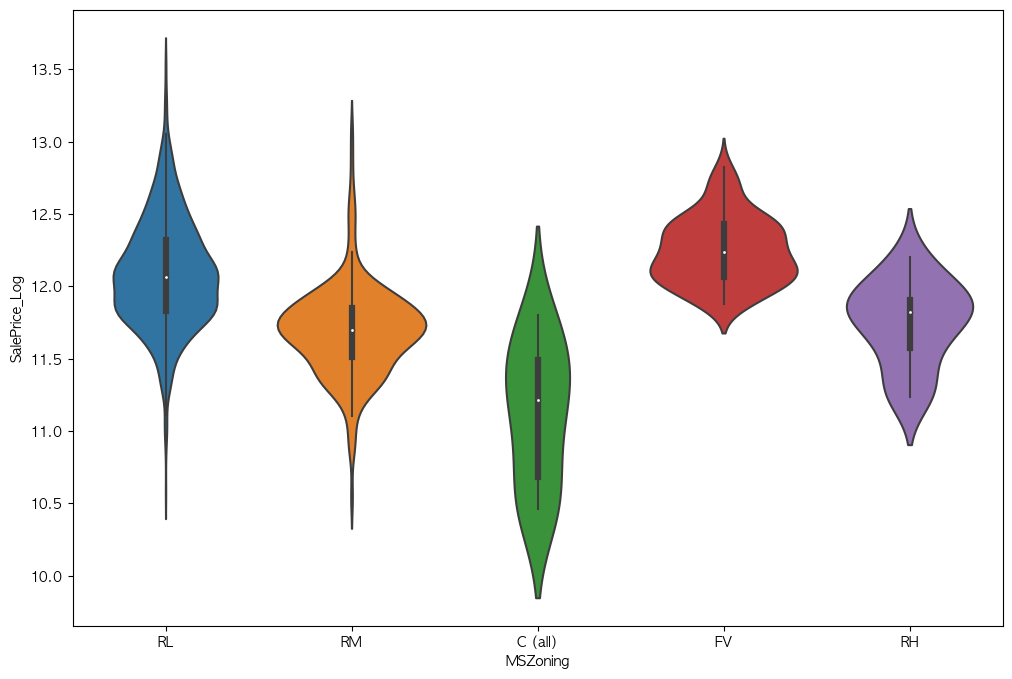

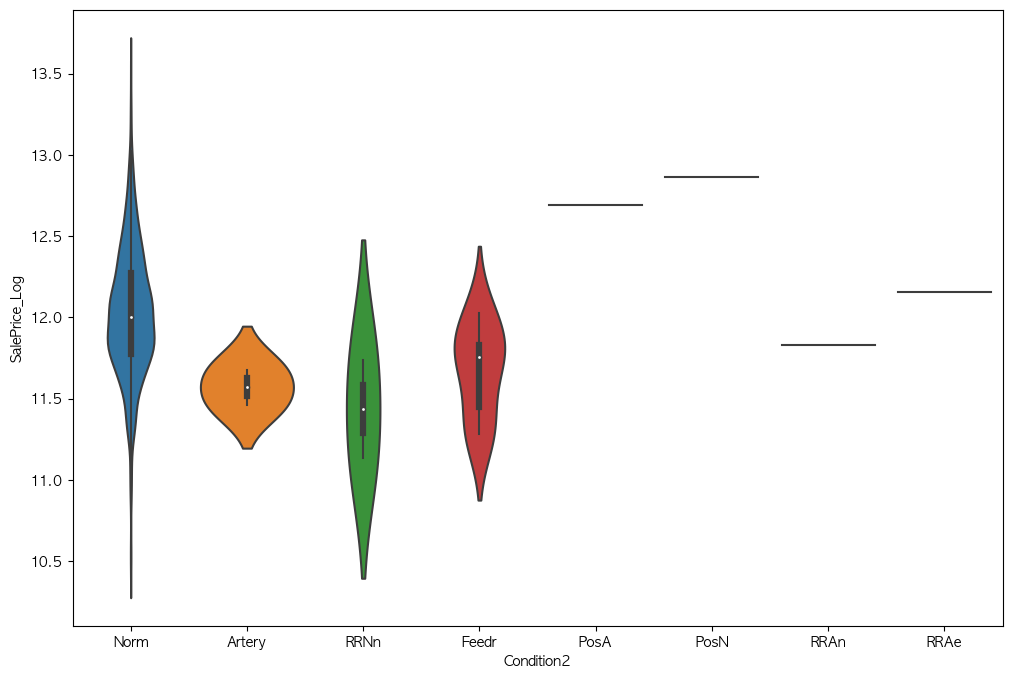

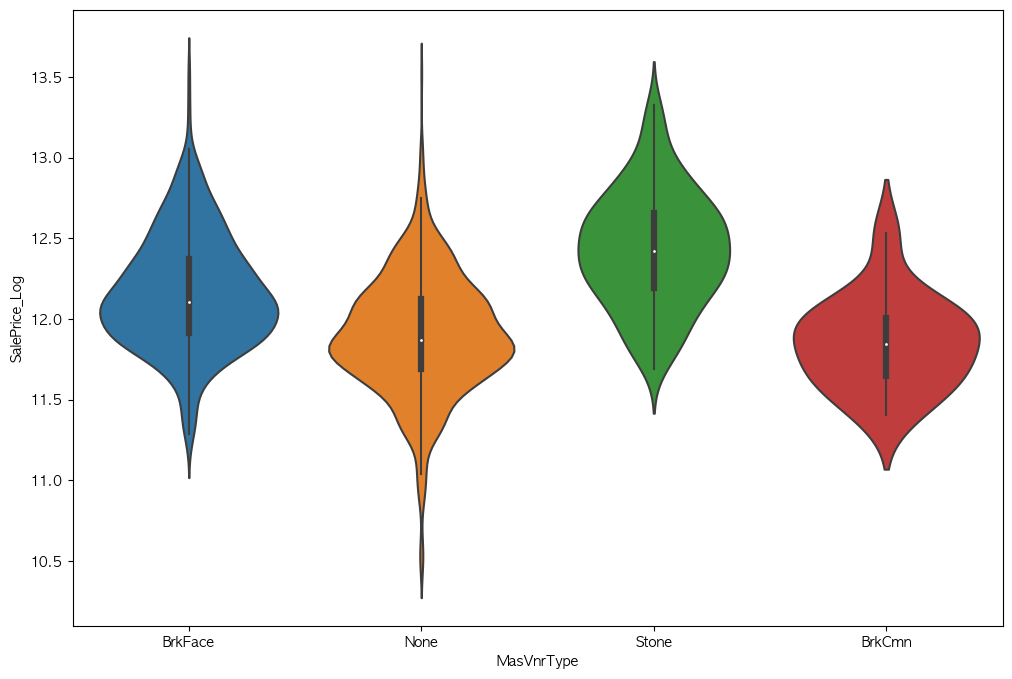

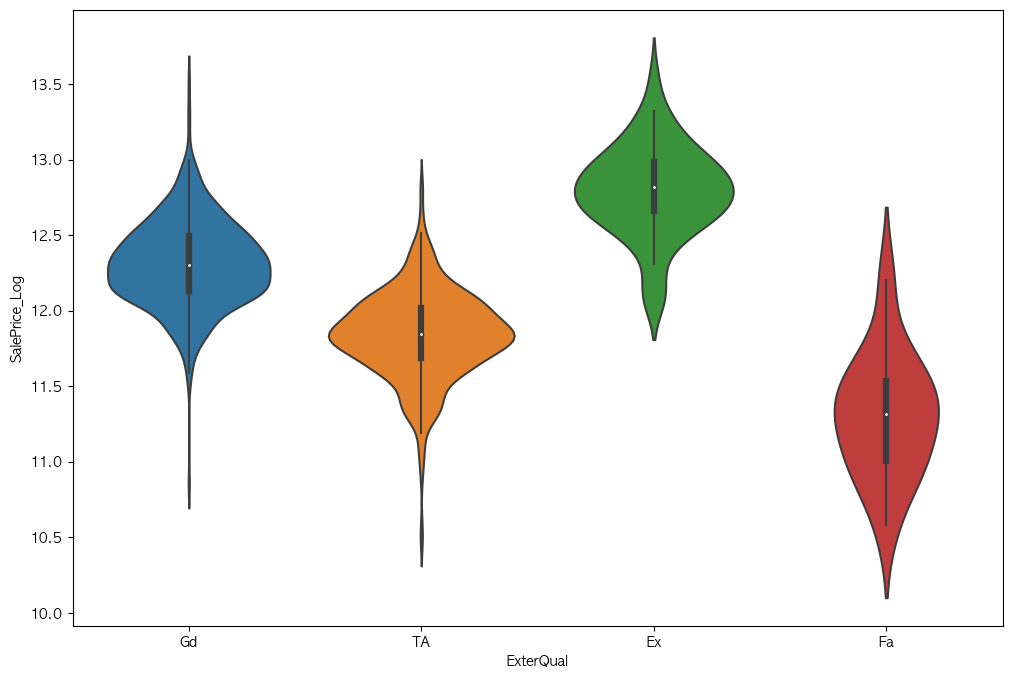

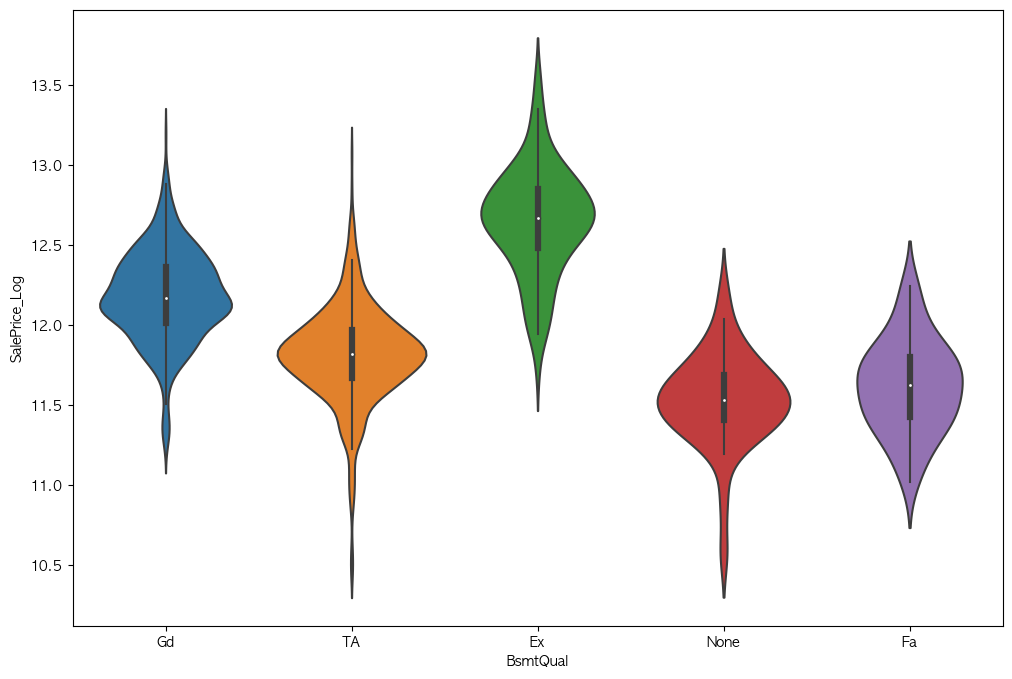

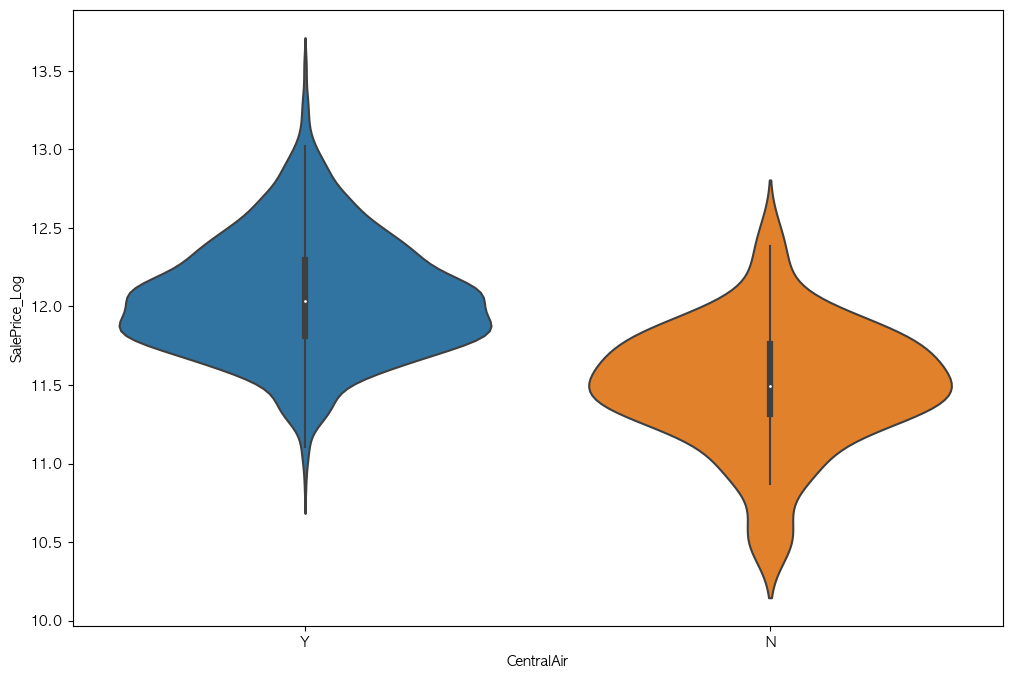

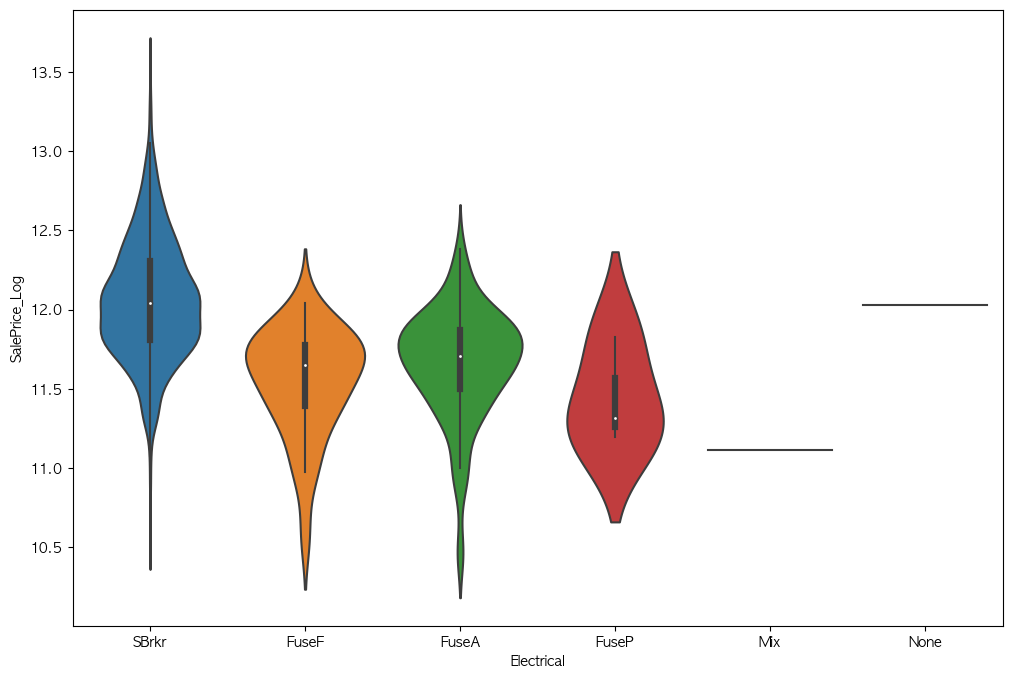

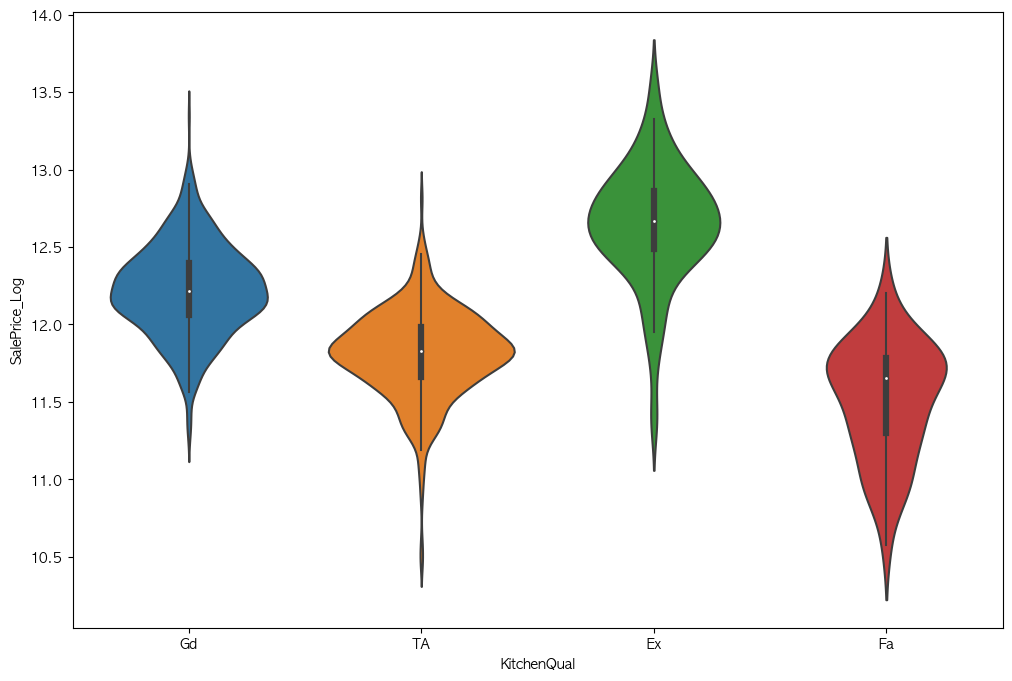

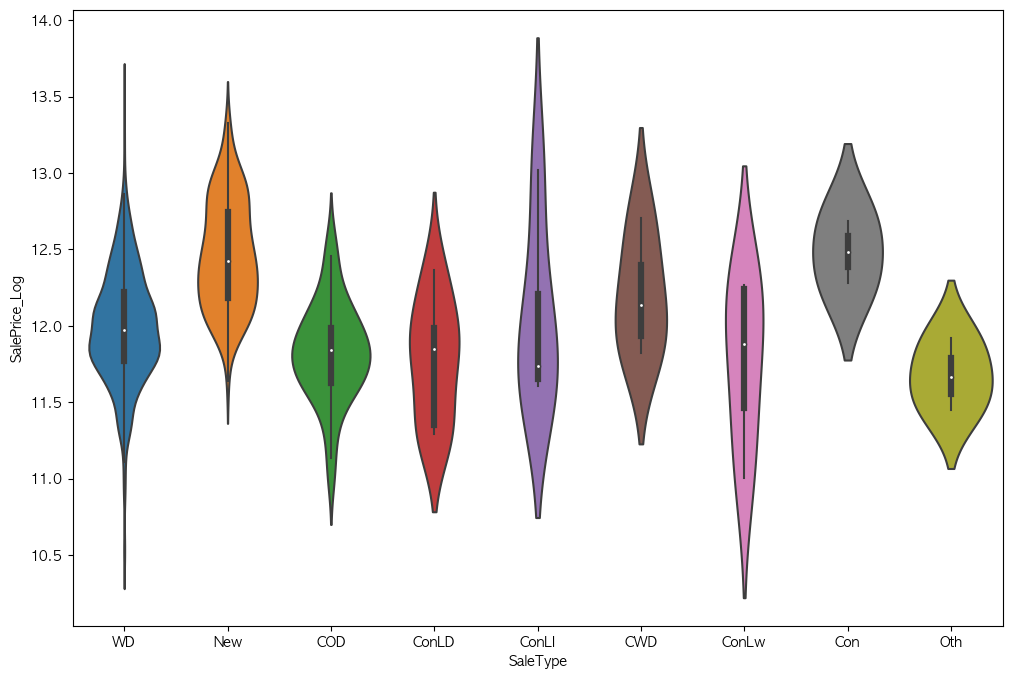

In [137]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list:
    sns.violinplot(x=catg, y=target, data=df_train)
    plt.show()

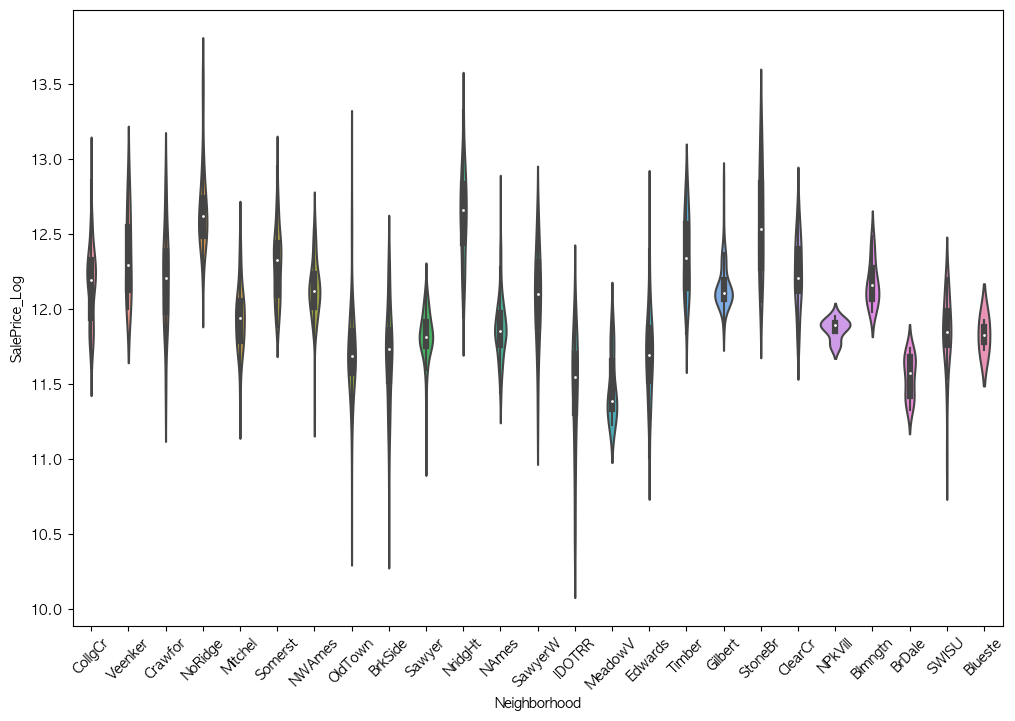

In [138]:

# 위 코드를 통해 결과를 보았을 때, Neighborhood와의 관계가 복잡하게 작성되어 있는 모습을 살펴볼 수 있었다.
# 이러한 경우엔 위 코드에서 remove를 통해 그래프를 이동시켜준 뒤, 밑 코드로 그래프를 따로 추출할 수 있도록 한다.
ig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [139]:
# 카테고리를 기준으로, 타겟과의 평균값을 살펴보고자 한다.
for catg in catg_list:
    print(df_train.groupby(catg)[target].mean())

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061099
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061474
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.645425
F

In [140]:
# 강사님이 전송해주신 분류(같은 등급으로 처리해주는 등(위 숫자보고 비교))
# MSZoning
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 

# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [141]:
for df in [df_train, df_test]:
    df['MSZ_num'] = 1 # 새로운 컬럼 추가
    df.loc[(df['MSZoning'].isin(msz_catg2)), 'MSZ_num'] = 2
    df.loc[(df['MSZoning'].isin(msz_catg3)), 'MSZ_num'] = 3
    # 중복된 것을 제거하며, 숫자로 변환 시키겠다.
    
    df['NbHd_num'] = 1
    df.loc[(df['Neighborhood'].isin(nbhd_catg2)), 'NbHd_num'] = 2
    df.loc[(df['Neighborhood'].isin(nbhd_catg3)), 'NbHd_num'] = 3

    df['Cond2_num'] = 1
    df.loc[(df['Condition2'].isin(cond2_catg2)), 'Cond2_num'] = 2
    df.loc[(df['Condition2'].isin(cond2_catg3)), 'Cond2_num'] = 3

    df['Mas_num'] = 1
    df.loc[(df['MasVnrType'] == 'Stone'), 'Mas_num'] = 2

    df['ExtQ_num'] = 1
    df.loc[(df['ExterQual'] == 'TA'), 'ExtQ_num'] = 2
    df.loc[(df['ExterQual'] == 'Gd'), 'ExtQ_num'] = 3
    df.loc[(df['ExterQual'] == 'Ex'), 'ExtQ_num'] = 4

    df['BsQ_num'] = 1
    df.loc[(df['BsmtQual'] == 'Gd'), 'BsQ_num'] = 2
    df.loc[(df['BsmtQual'] == 'Ex'), 'BsQ_num'] = 3

    df['CA_num'] = 0
    df.loc[(df['CentralAir'] == 'Y'), 'CA_num'] = 1
    # 0과 1 데이터로 처리(Yes(1) or No(0))

    df['Elc_num'] = 1
    df.loc[(df['Electrical'] == 'SBrkr'), 'Elc_num'] = 2

    df['KiQ_num'] = 1
    df.loc[(df['KitchenQual'] == 'Ta'), 'KiQ_num'] = 2
    df.loc[(df['KitchenQual'] == 'Gd'), 'KiQ_num'] = 3
    df.loc[(df['KitchenQual'] == 'Ex'), 'KiQ_num'] = 4

    df['SlTy_num'] = 2
    df.loc[(df['SaleType'].isin(SlTy_catg1)), 'SlTy_num'] = 1 # isin : 앞서 작성한 코드(중복되는 컬럼) 참고(중복된 값을 합쳐주기 위해 사용)
    df.loc[(df['SaleType'].isin(SlTy_catg1)), 'SlTy_num'] = 3
    df.loc[(df['SaleType'].isin(SlTy_catg1)), 'SlTy_num'] = 4

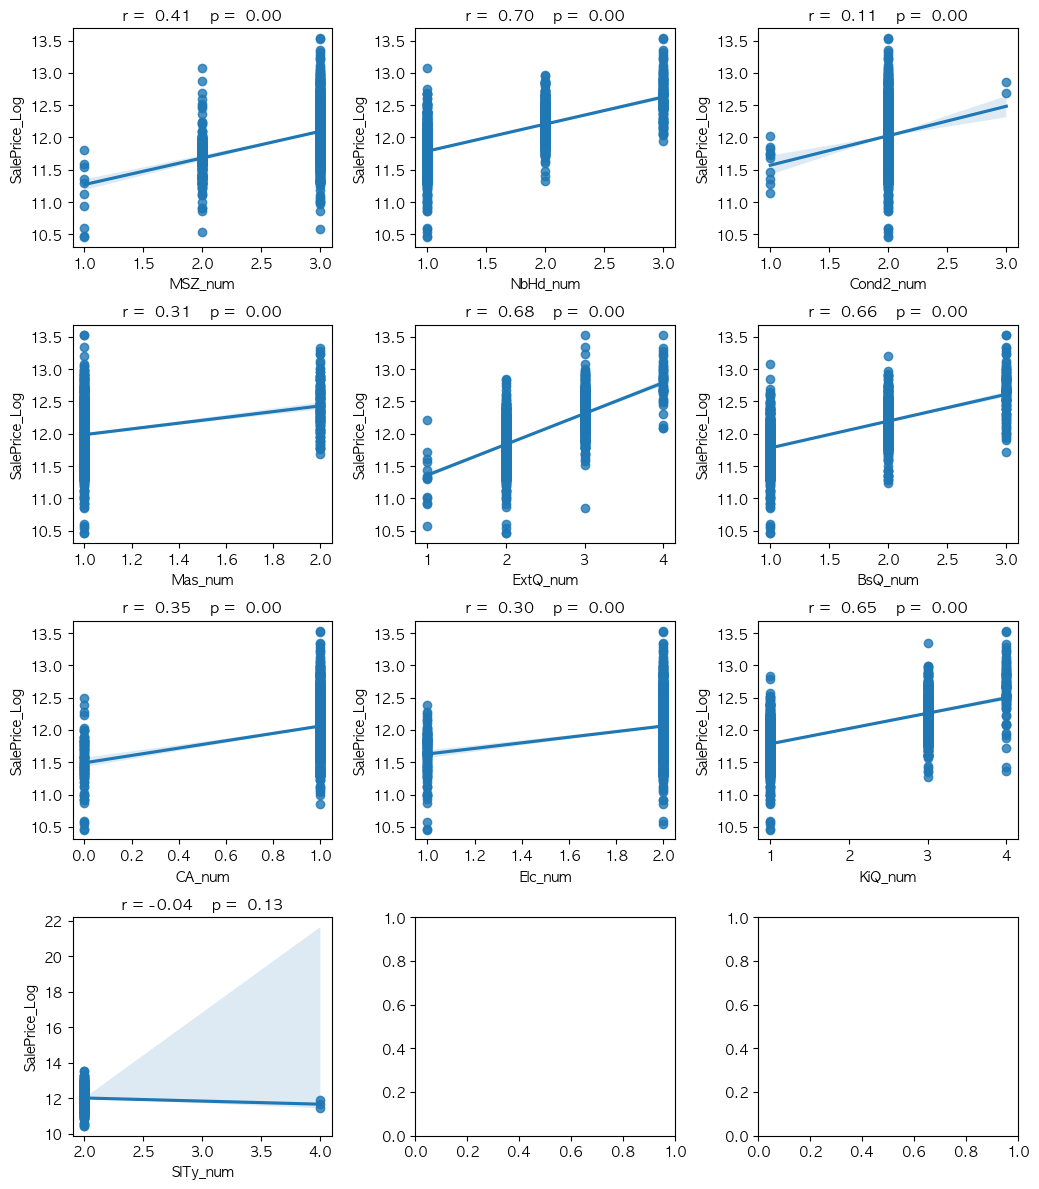

In [142]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

target = 'SalePrice_Log'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r*nr_cols + c
        if i < len(new_col_num):
            sns.regplot(x=new_col_num[i], y=target, data=df_train, ax=axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
            str_title = 'r = ' + '{0: .2f}'.format(stp[0]) + '    p = ' + '{0: .2f}'.format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)
        else:
            break

plt.tight_layout()
plt.show()

- 타겟변수와 상관관계가 큰 NdHd_num, ExtQ_num, BsQ_num, KiQ_num를 찾을 수 있었다.

In [143]:
print(catg_list)
print()
print(catg_strong_corr) # 해당 부분은 삭제 처리를 해주어야 한다.

['MSZoning', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

['MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [144]:
df.head()

MSZoning Neighborhood Condition2  OverallQual  YearBuilt  YearRemodAdd  \
0       RH        NAmes       Norm            5       1961          1961   
1       RL        NAmes       Norm            6       1958          1958   
2       RL      Gilbert       Norm            5       1997          1998   
3       RL      Gilbert       Norm            6       1998          1998   
4       RL      StoneBr       Norm            8       1992          1992   

  MasVnrType  MasVnrArea ExterQual BsmtQual  ...  MSZ_num NbHd_num Cond2_num  \
0       None         0.0        TA       TA  ...        2        1         2   
1    BrkFace       108.0        TA       TA  ...        3        1         2   
2       None         0.0        TA       Gd  ...        3        2         2   
3    BrkFace        20.0        TA       TA  ...        3        2         2   
4       None         0.0        Gd       Gd  ...        3        3         2   

   Mas_num  ExtQ_num BsQ_num  CA_num  Elc_num  KiQ_num  SlTy_num  
0        1         2       1       1        2        1         2  
1        1         2       1       1        2        3         2  
2        1         2       2       1        2        1         2  
3        1         2       1       1        2        3         2  
4        1         3       2       1        2        3         2  

[5 rows x 34 columns]

In [145]:
numerical_df = df_train.select_dtypes(include=[np.number]).columns
corr1 = df_train[numerical_df].corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]
# 드디어 숫자형 데이터와 기존에 있던 범주형 데이터를 함께 살펴볼 수 있게 되었다.

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)

for df in [df_train, df_test]:
    df.drop(cols_bel_corr_limit_1, axis = 1, inplace=True)
    df.drop(catg_strong_corr, axis = 1, inplace=True)
    #df.drop(catg_strong_corr, axis=1, inplace=True) # 추가한 애들을 다시 삭제
    #df.drop(['Ndhd_num'], axis=1, inplace=True)

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
BsQ_num          0.661286
GarageArea       0.656128
KiQ_num          0.650054
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
CA_num           0.351598
Mas_num          0.313280
Elc_num          0.304857
Cond2_num        0.107610
SlTy_num         0.039628
Name: SalePrice_Log, dtype: float64


In [146]:
numerical_df = df_train.select_dtypes(include=[np.number]).columns
corr2 = df_train[numerical_df].corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]
ser_corr_2

SalePrice_Log    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
NbHd_num         0.696962
ExtQ_num         0.682225
GarageCars       0.681033
BsQ_num          0.661286
GarageArea       0.656128
KiQ_num          0.650054
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
MSZ_num          0.409423
LotArea_Log      0.402814
Name: SalePrice_Log, dtype: float64

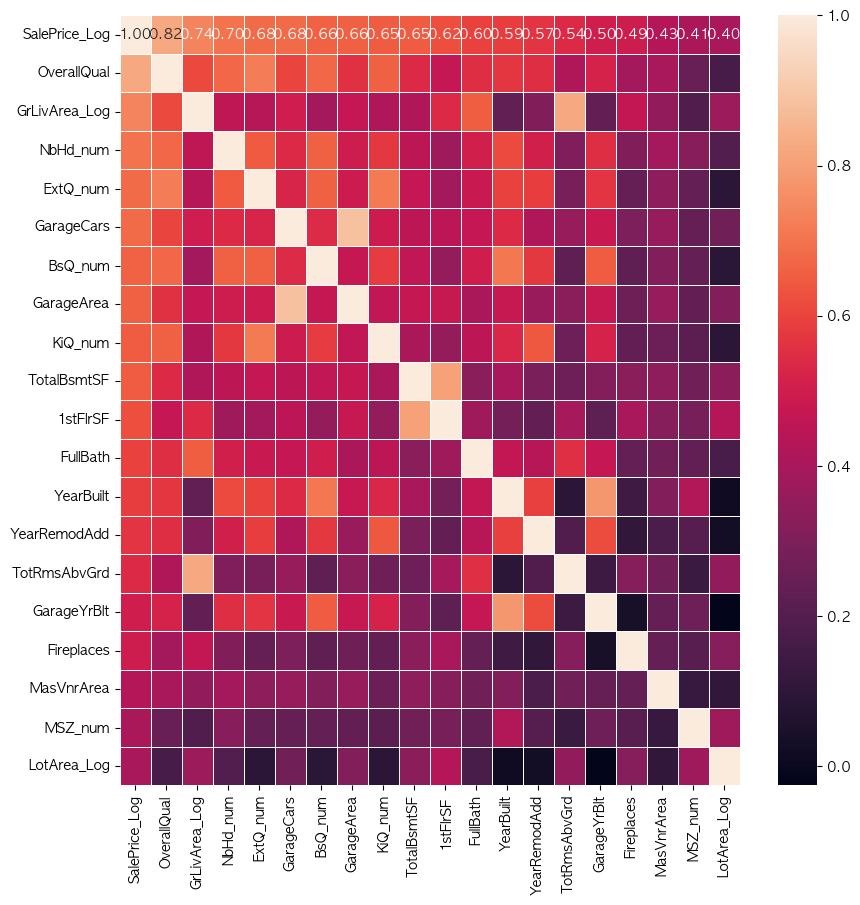

In [147]:
# 히트맵
#plt.figure(figsize=(10, 5))
plot_corr_matrix(df_train, df_train.shape[1], target)

- 타겟을 제외한 특성끼리 관계가 같은 쌍들은 다음과 같다.
1) GarageArea & GarangeCars 
2) GrLivArea_Log & TotRmsAbvGrd
3) TotalBsmtSF & lstFlrSF
4) YearBuilt & GarageYrBlt

그 특성 중 상관 계수가 더 작은 것들을 삭제한다.

(그래프를 보고, 변수가 작성되어 있는 순서에 따라 구분해줄 수 있다.)
1) -> GarageArea가 더 작다.
2) -> TotRmsAbvGrd가 더 작다.
3) -> lstFlrSF가 더 작다.
4) -> GarageYrBlt가 더 작다.

위 열들이 상관 계수가 더 작은 것들을 의미한다.

In [148]:
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

for col in ['GarageArea', 'TotRmsAbvGrd', 'lstFlrSF', 'GarageYrBlt']:
    if col in cols:
        cols.remove(col)

In [149]:
print(cols)

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [150]:
cols.remove('SalePrice_Log')
print(cols)

['OverallQual', 'GrLivArea_Log', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [80]:
df_train_ml = df_train[cols].copy()
df_test_ml = df_test[cols].copy()

y = df_train[target]

KeyError: "['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2'] not in index"

In [81]:
df_train_ml.head()

NameError: name 'df_train_ml' is not defined

In [82]:
df_test_ml.head()

NameError: name 'df_test_ml' is not defined